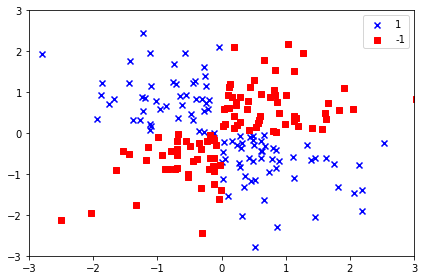

In [21]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

X_xor = np.random.randn(200,2)
#plt.scatter(X_xor[:,0],X_xor[:,1])

y_xor = np.logical_xor(X_xor[:,0] >0, X_xor[:,1] >0)
# X_xor[5:10,0],X_xor[5:10,1],y_xor[5:10]
y_xor = np.where(y_xor, 1,-1)

plt.scatter(X_xor[y_xor==1, 0],X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0],X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])

plt.legend(loc='best')
plt.tight_layout()
plt.show()

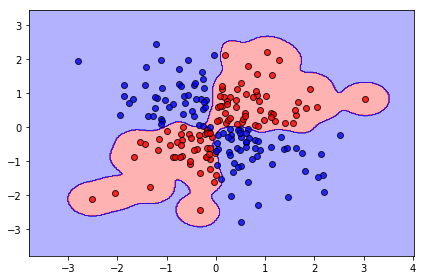

In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=10, C=1.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.tight_layout()

plt.show()

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


iris = datasets.load_iris()
X = iris.data[:,[0,2]] #2列目:petal length（花びらの長さ）、3列目:petal width（花びらの幅）
y = iris.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

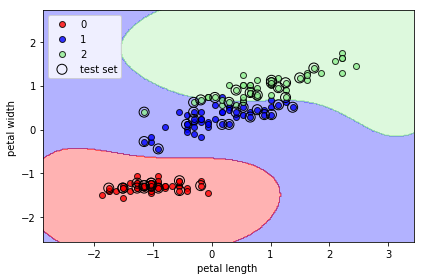

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=1, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))

plt.xlabel('petal length ')
plt.ylabel('petal width ')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()